In [19]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [20]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [21]:
root = '../../Datasets/ShanghaiTech_Crowd_Counting_Dataset/'

In [22]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [23]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [24]:
model = CSRNet()

In [26]:
model = model.cuda()

In [27]:
checkpoint = torch.load('model_best.pth.tar')

In [28]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [29]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i,mae)
print(mae/len(img_paths))

0 1934.8165283203125
1 27937.320434570312
2 37671.51574707031
3 47721.74523925781
4 49693.732421875
5 61557.7041015625
6 64132.89892578125
7 69121.78125
8 76870.04052734375
9 79305.95556640625
10 88606.69873046875
11 147189.81982421875
12 151263.66918945312
13 165469.51293945312
14 171815.75122070312
15 181997.68579101562
16 187357.77319335938
17 194033.19604492188
18 195628.79272460938
19 197370.3868408203
20 222270.2188720703
21 227768.6778564453
22 230010.37048339844
23 232946.2550048828
24 251864.3077392578
25 259696.5235595703
26 268074.4552001953
27 288568.0059814453
28 291528.24572753906
29 321291.29064941406
30 332945.26721191406
31 339188.35510253906
32 353173.87268066406
33 361635.34143066406
34 376830.57775878906
35 392985.38146972656
36 424352.49865722656
37 452163.95373535156
38 459351.08166503906
39 470095.50939941406
40 505783.20471191406
41 508030.18029785156
42 529479.1431884766
43 544717.1773681641
44 548131.7818603516
45 550805.8406982422
46 570408.1824951172
47 5913

Predicted Count :  1992


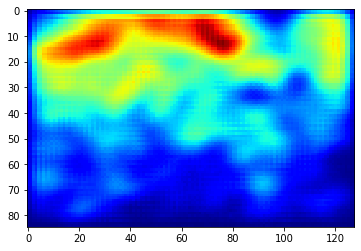

Original Count :  1164


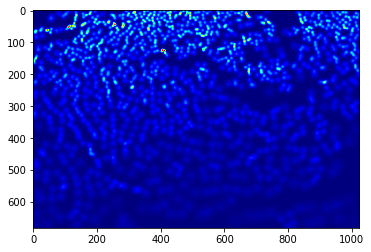

Original Image


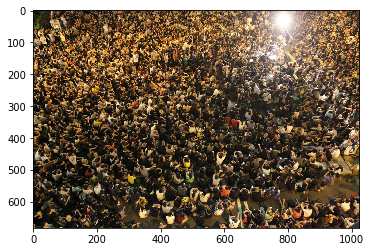

In [35]:
from matplotlib import cm as c
img = transform(Image.open(os.path.join(root, 'part_A_final/test_data/images/IMG_104.jpg')).convert('RGB')).cuda()
output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File(os.path.join(root, 'part_A_final/test_data/ground_truth/IMG_104.h5'), 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread(os.path.join(root, 'part_A_final/test_data/images/IMG_104.jpg')))
plt.show()